In [ ]:
# Questions:
# 1. Display Top 10 Rows of The Dataset - done
# 2. Check Last 5 Rows of The Dataset - done
# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns) - done
# 4. Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement - done
# 5. Check Null Values In The Dataset - done
# 6. Check For Duplicate Data and Drop Them - done
# 7. Find Out Number of Courses Per Subjects - done
# 8. For Which Levels, Udemy Courses Providing The Courses
# 9. Display The Count of Paid and Free Courses 
# 10. Which Course Has More Lectures (Free or Paid)?
# 11. Which Courses Have A Higher Number of Subscribers Free or Paid?
# 12. Which Level Has The Highest Number of Subscribers?
# 13. Find Most Popular Course Title
# 14. Display 10 Most Popular Courses As Per Number of Subscribers
# 15. Find The Course Which Is Having The Highest Number of Reviews.
# 16. Does Price Affect the Number of Reviews?
# 17. Find Total Number of Courses Related To Python
# 18. Display 10 Most Popular Python Courses As Per Number of Subscribers
# 19. In Which Year The Highest Number of Courses Were Posted?
# 20. Display Category-Wise Count of Posted Subjects [Year Wise] 

In [75]:
import pandas as pd
import matplotlib as mpl
import openpyxl, time
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns

file = 'd:\\RAW_DATA\\udemy_courses.csv'
df = pd.read_csv(file)

In [11]:
# 5. Check Null Values In The Dataset
# df.isnull().values.any()
# sns.heatmap(df.isnull())

In [74]:
# 6. Check For Duplicate Data and Drop Them
# df[df.duplicated()]
# print(df.shape)
df = df.drop_duplicates()
# display(df.shape)

In [ ]:
# 7. Find Out Number of Courses Per Subjects - done
df1 = df['subject'].value_counts().reset_index()
df1
df1.plot(kind='bar',x='index',y='subject',rot=35)

In [77]:
# 8. For Which Levels, Udemy Courses Providing The Courses
df['level'].value_counts()

All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: level, dtype: int64

<AxesSubplot: xlabel='index'>

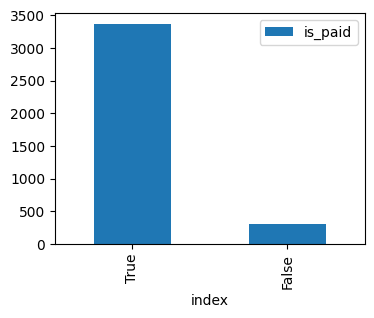

In [140]:
# 9. Display The Count of Paid and Free Courses 
df['is_paid'].value_counts().reset_index().plot(kind='bar',x='index',y='is_paid',figsize=(4,3),legend=True)

In [165]:
# 10. Which Course Has More Lectures (Free or Paid)?
df.columns
df.groupby(['is_paid'])['num_lectures'].mean()


is_paid
False    21.416129
True     41.829276
Name: num_lectures, dtype: float64

<AxesSubplot: xlabel='is_paid'>

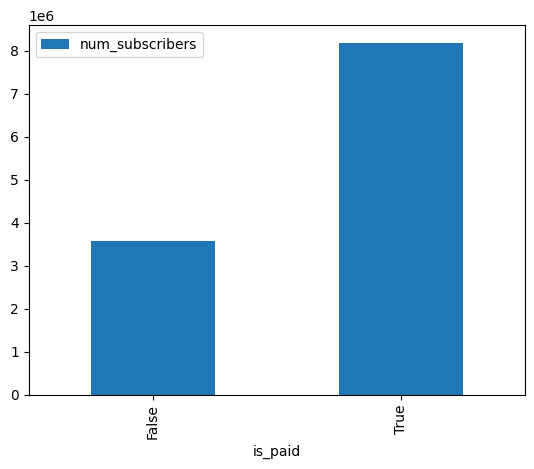

In [170]:
# 11. Which Courses Have A Higher Number of Subscribers Free or Paid?
df.columns
df1 = df.groupby(['is_paid'])['num_subscribers'].sum().reset_index()
df1
df1.plot(kind="bar",x="is_paid",y='num_subscribers')

<AxesSubplot: xlabel='level', ylabel='num_subscribers'>

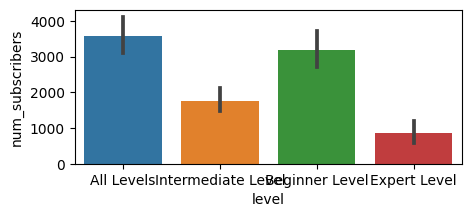

In [83]:
# 12. Which Level Has The Highest Number of Subscribers?
df.columns
plt.figure(figsize=(5,2))
sns.barplot(x='level',y='num_subscribers',data=df)

In [12]:
# 13. Find Most Popular Course Title
# df.columns
# print(df[df['num_subscribers'].max()==df['num_subscribers']]['course_title'])


<AxesSubplot: xlabel='num_subscribers', ylabel='course_title'>

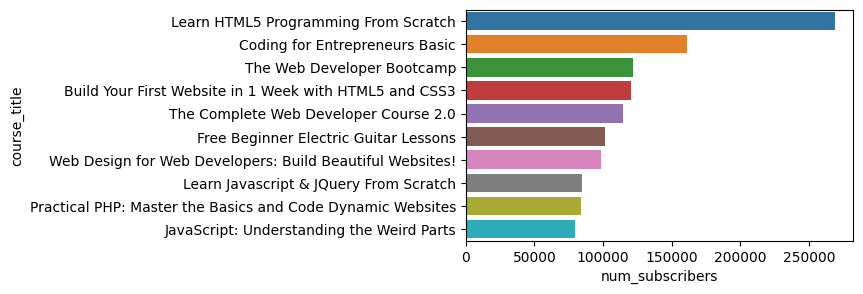

In [60]:
# 14. Display 10 Most Popular Courses As Per Number of Subscribers
df = df[['course_title','num_subscribers']].sort_values(by ='num_subscribers', ascending=False).reset_index()
df = df.head(10)
plt.figure(figsize=(5,3))
sns.barplot(y='course_title',x='num_subscribers',data=df)

<AxesSubplot: xlabel='subject', ylabel='num_reviews'>

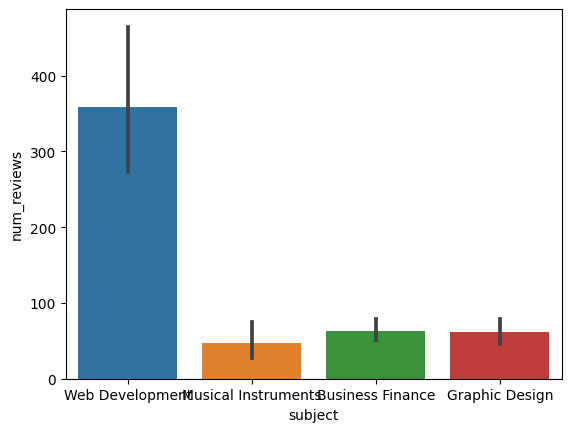

In [26]:
# 15. Find The Course Which Is Having The Highest Number of Reviews.
df.columns
df1 = df[['subject','num_reviews']].sort_values(by='num_reviews',ascending=False)
sns.barplot(x="subject",y='num_reviews',data=df1)

In [ ]:
# 16. Does Price Affect the Number of Reviews?


In [91]:
# 17. Find Total Number of Courses Related To Python
df.columns
print(len(df[df['course_title'].str.contains("python",case=False)]))

29


<AxesSubplot: xlabel='num_subscribers', ylabel='course_title'>

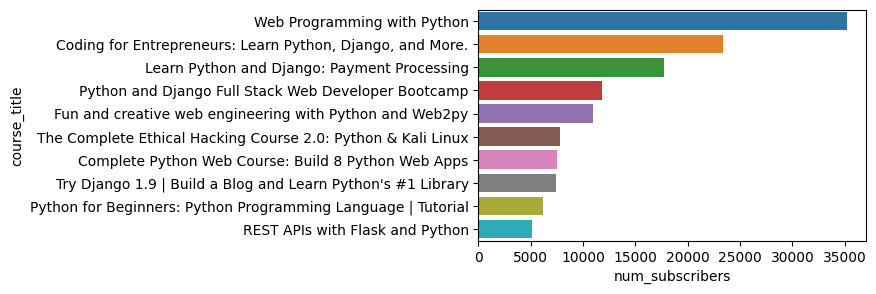

In [121]:
# 18. Display 10 Most Popular Python Courses As Per Number of Subscribers
df1 = df[df['course_title'].str.contains("python",case=False)].groupby('course_title')['num_subscribers'].sum().reset_index()
df1 = df1.sort_values(by='num_subscribers',ascending=False).head(10).reset_index()
plt.figure(figsize=(5,3))
sns.barplot(y='course_title',x='num_subscribers',data=df1)

In [161]:
# 19. In Which Year The Highest Number of Courses Were Posted?
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['Year'] = df['published_timestamp'].dt.year.astype('str')
df1 = df.groupby(['Year'])['course_title'].count().reset_index()
print(df1)
# sns.countplot('Year',date=df)
# sns.barplot(x='Year',y='course_title',date=df1)

   Year  course_title
0  2011             5
1  2012            45
2  2013           202
3  2014           491
4  2015          1014
5  2016          1206
6  2017           715


<AxesSubplot: xlabel='Year', ylabel='count'>

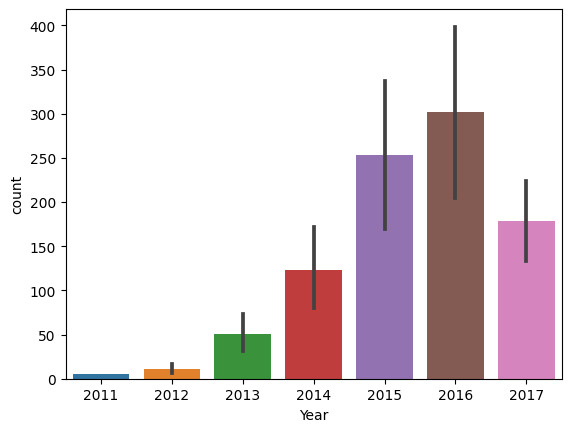

In [178]:
# 20. Display Category-Wise Count of Posted Subjects [Year Wise]
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['Year'] = df['published_timestamp'].dt.year
df1 = df.groupby('Year')['subject'].value_counts().rename("count").reset_index()
# print(df1)
sns.barplot(x='Year',y='count',data=df1)